In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerTuple
import matplotlib.cm as cm
from astropy.table import Table, vstack
import pandas as pd
from astropy.io import ascii
import os 
import glob 
# pd.set_option('display.max_rows', None)

plt.style.use('format.mplstyle')

In [3]:
files = glob.glob("*.snana.txt")
for file in files:
    print(file)

2021nip_data.snana.txt
2020tly_YSEdata.snana.txt
2020absk_data.snana.txt
2021inc_data.snana.txt
2020awg_data.snana.txt
2021bwv_data.snana.txt
2020ovk_data.snana.txt
2020rth_data.snana.txt
2020jww_data.snana.txt
2021arg_data.snana.txt
2021krc_data.snana.txt
2020nim_data.snana.txt
2020hgw_data.snana.txt
2020zx_data.snana.txt


In [4]:
def import_snana(filename):
    start_data = False
    table = None
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
    table['MJD']    = table['MJD'].astype(float)
    table['FLT'] = table['FLT'].astype(str)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['MAG'] = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    return(table)

In [5]:
absk = import_snana('2020absk_data.snana.txt')
awg = import_snana('2020awg_data.snana.txt')
hgw = import_snana('2020hgw_data.snana.txt')
jfo = import_snana('2020jfo_lightcurves')
jww = import_snana('2020jww_data.snana.txt')
nim = import_snana('2020nim_data.snana.txt')
ovk = import_snana('2020ovk_data.snana.txt')
rth = import_snana('2020rth_data.snana.txt')
tly = import_snana('2020tly_YSEdata.snana.txt')
zx = import_snana('2020zx_data.snana.txt')
arg = import_snana('2021arg_data.snana.txt')
bwv = import_snana('2021bwv_data.snana.txt')
inc = import_snana('2021inc_data.snana.txt')
krc = import_snana('2021krc_data.snana.txt')
nip = import_snana('2021nip_data.snana.txt')


In [6]:
full_data_set = [hgw, jfo, jww, rth, tly]
full_data_set_df = []
for table in full_data_set:
    df = table.to_pandas()
    nonnegative = df.dropna()
    full_data_set_df.append(nonnegative)

full_object_names = ['2020hgw', '2020jfo', '2020jww', '2020rth', '2020tly']

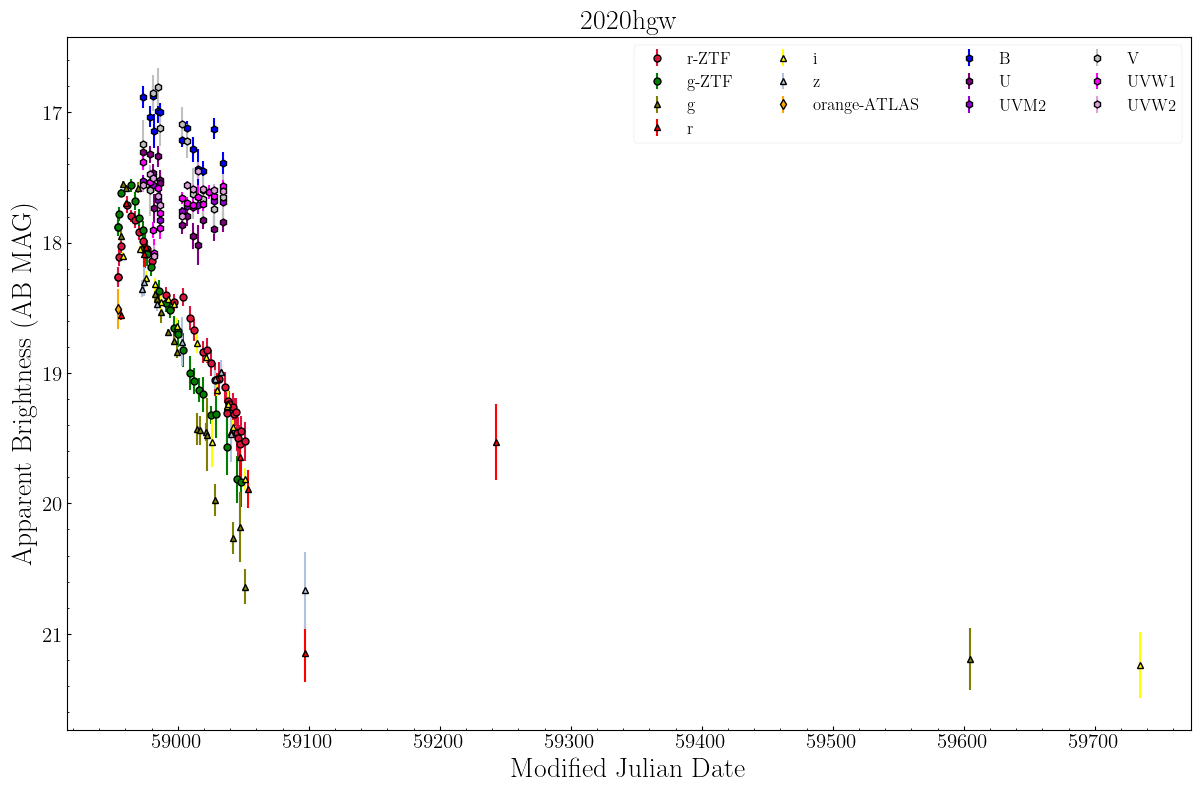

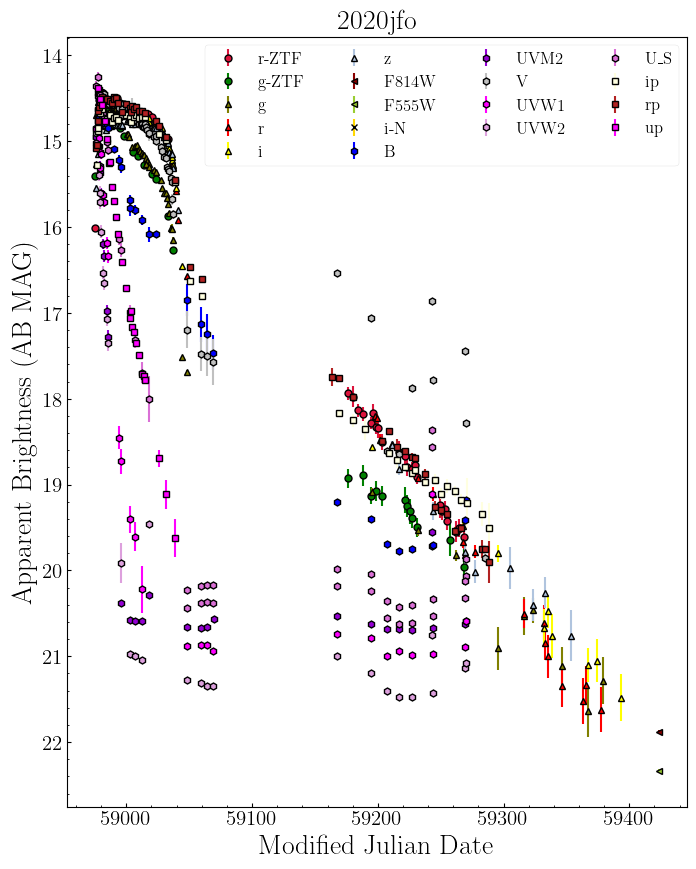

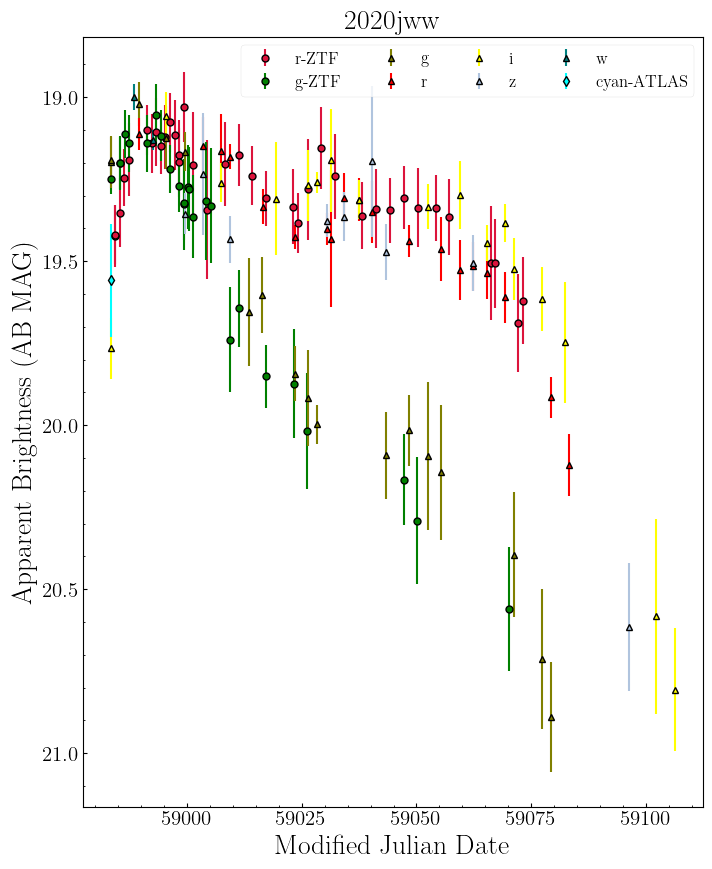

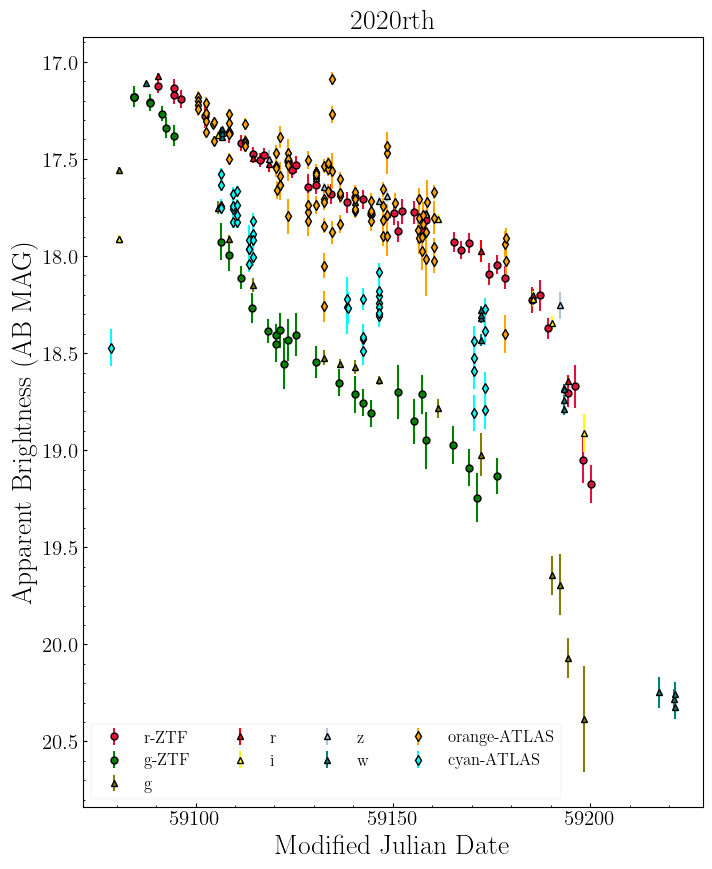

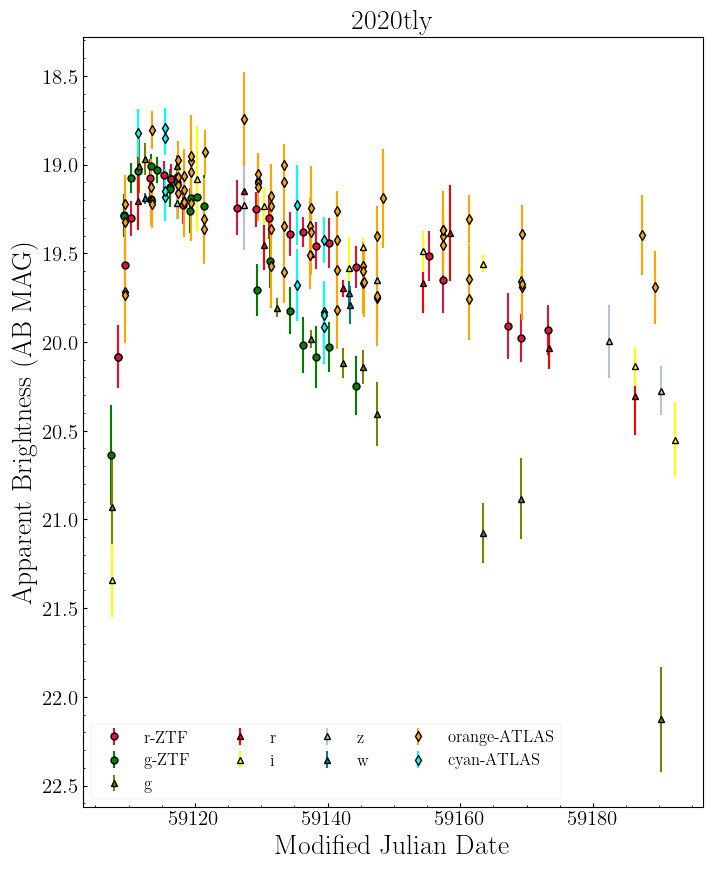

In [7]:
for idx, df in enumerate(full_data_set_df):
    plt.figure(idx)
    colors = {'B':'blue', 'F555W':'yellowgreen', 'F814W': 'darkred','G':'black', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
          'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange-ATLAS':'orange', 
         'r':'red', 'r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
    PAN = {}
    ZTF = {}
    ATLAS = {}
    HST = {}
    GAIA = {}
    NICKEL = {}
    SWOPE = {}
    SWIFT = {}
    plt.rcParams['figure.figsize'] = (8,10)  
    for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:            
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            ZTF[filt] = l
    for i, filt in enumerate(['G']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask])>0:            
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = '+', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            GAIA[filt] = l       
    for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:            
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = '^', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            PAN[filt] = l
    for i, filt in enumerate(['F814W', 'F555W']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:            
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = '<', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            HST[filt] = l
    for i, filt in enumerate([ 'orange-ATLAS', 'cyan-ATLAS']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'd', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            ATLAS[filt] = l
    for i, filt in enumerate([ 'i-N']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'x', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            NICKEL[filt] = l
    for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'h', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            SWIFT[filt] = l
    for i, filt in enumerate(['ip', 'rp', 'up']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0 
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 's', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            SWOPE[filt] = l
    plt.gca().invert_yaxis()
    plt.title(full_object_names[idx], fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('Modified Julian Date', fontsize = 20)
    plt.ylabel('Apparent Brightness (AB MAG)', fontsize = 20)
    plt.legend(ncol = 4, fontsize = 'large')    

In [8]:
# extrabol input only takes in .dat files with line 1 being redshift and line 2 being Milky Way E(B-V)
# format is TIME(MJD) APPARENT_MAGNITUDE ERROR(MAG) FILTER_SVO_ID MAG_SYSTEM
redshifts = [0.043, 0.005, 0.046, 0.0184, 0.058] 
MW_red = [0.011, 0.06, 0.06, 0.06, 0.06]
def extrabol_inputs(object, df):
    filter_svo = {'B':'Swift/UVOT.B_fil', 'U':'Swift/UVOT.U_fil', 'UVM2':'Swift/UVOT.UVM2_fil', 'UVW1':'Swift/UVOT.UVW1_fil', 'UVW2':'Swift/UVOT.UVW2_fil', 'U_S':'Swift/UVOT.U_fil', 
    'V':'Swift/UVOT.V_fil', 'G':'GAIA/GAIA0.G', 'F555W':'HST/WFC3_UVIS1.F555W', 'F814W':'HST/WFC3_UVIS1.F814W', 'cyan-ATLAS':'Misc/Atlas.cyan', 'orange-ATLAS':'Misc/Atlas.orange', 
    'g':'PAN-STARRS/PS1.g', 'r':'PAN-STARRS/PS1.r', 'i':'PAN-STARRS/PS1.i', 'w': 'PAN-STARRS/PS1.w', 'y':'PAN-STARRS/PS1.y', 'z':'PAN-STARRS/PS1.z', 'g-ZTF':'Palomar/ZTF.g', 
    'r-ZTF':'Palomar/ZTF.r', 'gp':'SLOAN/SDSS.gprime_filter', 'rp':'SLOAN/SDSS.rprime_filter', 'ip':'SLOAN/SDSS.iprime_filter', 'up':'SLOAN/SDSS.uprime_filter', 'i-N': 'Generic/Cousins.I'}
    for idx, df in enumerate(full_data_set_df):
        df = df.rename(columns = {'FLT':'FLT_SVO_ID'})
        df['FLT_SVO_ID'] = df['FLT_SVO_ID'].map(filter_svo)
        df.drop(['FLUXCAL', 'FLUXCALERR', 'TELESCOPE', 'MAGSYS'], axis=1, inplace=True)
        df.insert(4, 'MAG TYPE', 'AB')
        df = df[['MJD', 'MAG', 'MAGERR', 'FLT_SVO_ID', 'MAG TYPE']]
        df = df.dropna()
        mask = (df['MAGERR'] < 0.3) & (df['MAGERR'] > 0) 
        df = df[mask]
        filename = full_object_names[idx] + '.dat' 
        df.to_csv(filename, sep = ' ', header=False, index=False)
        print(df)

In [9]:
extrabol_inputs(full_object_names, full_data_set_df)

           MJD     MAG  MAGERR        FLT_SVO_ID MAG TYPE
0    58954.387  17.882   0.067     Palomar/ZTF.g       AB
1    58954.444  18.263   0.075     Palomar/ZTF.r       AB
2    58955.404  17.780   0.055     Palomar/ZTF.g       AB
3    58955.426  18.111   0.065     Palomar/ZTF.r       AB
4    58956.343  18.028   0.055     Palomar/ZTF.r       AB
..         ...     ...     ...               ...      ...
268  58971.360  18.050   0.030  PAN-STARRS/PS1.i       AB
269  59003.387  18.760   0.190  PAN-STARRS/PS1.z       AB
270  59038.348  19.240   0.100  PAN-STARRS/PS1.i       AB
289  59604.611  21.191   0.237  PAN-STARRS/PS1.g       AB
330  59734.274  21.242   0.254  PAN-STARRS/PS1.i       AB

[196 rows x 5 columns]
              MJD        MAG    MAGERR            FLT_SVO_ID MAG TYPE
0    58976.096620  14.356838  0.054204      Swift/UVOT.U_fil       AB
1    58977.700058  14.246177  0.054169      Swift/UVOT.U_fil       AB
2    58978.230370  14.395898  0.054154      Swift/UVOT.U_fil       AB


In [10]:
full_data_set_df

[    VARLIST:        MJD    FLT  FLUXCAL  FLUXCALERR     MAG  MAGERR MAGSYS  \
 0       OBS:  58954.387  g-ZTF    0.067       0.067  17.882   0.067   None   
 1       OBS:  58954.444  r-ZTF    0.075       0.075  18.263   0.075   None   
 2       OBS:  58955.404  g-ZTF    0.055       0.055  17.780   0.055   None   
 3       OBS:  58955.426  r-ZTF    0.065       0.065  18.111   0.065   None   
 4       OBS:  58956.343  r-ZTF    0.055       0.055  18.028   0.055   None   
 ..       ...        ...    ...      ...         ...     ...     ...    ...   
 337     OBS:  59776.296      r    0.507       0.507  21.686   0.507   None   
 339     OBS:  59780.301      r    1.473       1.473  21.492   1.473   None   
 340     OBS:  59780.305      z    3.249       3.249  21.866   3.249   None   
 341     OBS:  59781.264      r    2.035       2.035  21.712   2.035   None   
 345     OBS:  59789.269      r    4.188       4.188  23.301   4.188   None   
 
        TELESCOPE  
 0            P48  
 1        

/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_52845/3865562131.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(hgw_df[mask])>0:


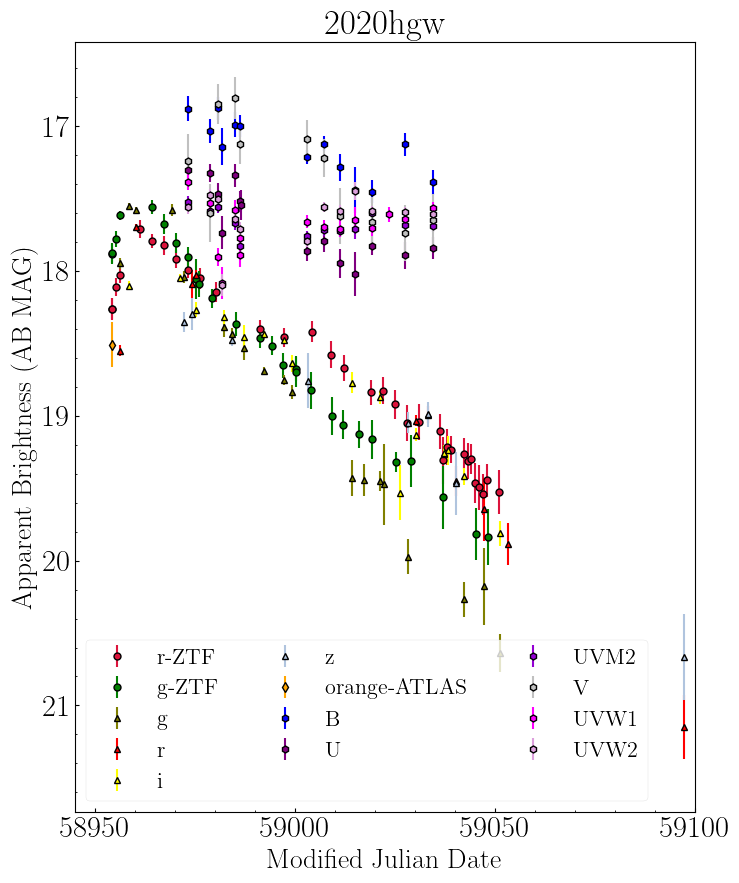

In [11]:
hgw_df = full_data_set_df[0]
colors = {'B':'blue', 'F555W':'yellowgreen', 'F814W': 'darkred','G':'black', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
        'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange-ATLAS':'orange', 
        'r':'red', 'r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
PAN = {}
ZTF = {}
ATLAS = {}
HST = {}
GAIA = {}
NICKEL = {}
SWOPE = {}
SWIFT = {}
plt.rcParams['figure.figsize'] = (8,10)  
for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:            
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
for i, filt in enumerate(['G']):
    mask = hgw_df['FLT'] == filt
    upperlim = df['MAGERR'] < .3
    nonzero = df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask])>0:            
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = '+', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        GAIA[filt] = l       
for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:            
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = '^', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
for i, filt in enumerate(['F814W', 'F555W']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:            
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = '<', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        HST[filt] = l
for i, filt in enumerate([ 'orange-ATLAS', 'cyan-ATLAS']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = 'd', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ATLAS[filt] = l
for i, filt in enumerate([ 'i-N']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = 'x', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        NICKEL[filt] = l
for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = 'h', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWIFT[filt] = l
for i, filt in enumerate(['ip', 'rp', 'up']):
    mask = hgw_df['FLT'] == filt
    upperlim = hgw_df['MAGERR'] < .3
    nonzero = hgw_df['MAGERR'] >= 0 
    mask = mask & upperlim & nonzero
    if len(hgw_df[mask]) > 0:
        l = plt.errorbar(hgw_df[mask]['MJD'], hgw_df[mask]['MAG'], yerr = hgw_df[mask]['MAGERR'], fmt = 's', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWOPE[filt] = l
plt.gca().invert_yaxis()
plt.xlim(59000-55, 59100)
plt.title('2020hgw')
plt.xlabel('Modified Julian Date')
plt.ylabel('Apparent Brightness (AB MAG)')
plt.legend(ncol = 3)

# Haille's edits

In [112]:
instruments = {'ZTF': ['g-ZTF', 'r-ZTF'], 
               'GAIA': ['G'], 
               'PANSTARRS': ['g', 'r', 'i', 'z', 'w', 'y'], 
               'HST': ['F814W', 'F555W'], 
               'ATLAS': ['orange-ATLAS', 'cyan-ATLAS'], 
               'NICKEL': ['i-N'], 
               'SWIFT': ['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S'], 
               'SWOPE': ['ip', 'rp', 'up']}

# Create reverse mapping: band -> instrument
band_to_instrument = {}
for instrument, bands in instruments.items():
    for band in bands:
        band_to_instrument[band] = instrument

colors = {'B':'blue', 'F555W':'yellowgreen', 'F814W': 'darkred','G':'black', 'U': 'purple', 
          'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
            'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold',
            'ip':'lightyellow', 'orange-ATLAS':'orange', 
            'r':'red', 'r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 
            'w':'teal', 'y':'navy', 'z':'lightsteelblue' }

shape = {'ZTF': 'o',
         'GAIA': '<', # I do not think there is any gaia? swapped symbol with HST
         'PANSTARRS': '^',
         'HST': '+',
         'ATLAS': 'd',
         'NICKEL': 'x',
         'SWIFT': 'h',
         'SWOPE': 's'}

bandname_dict = {key: key for key in colors.keys()}
bandname_dict.update({'U_S': r'$U_S$', 'orange-ATLAS': 'o', 'cyan-ATLAS': 'c'})

def get_formating(band):
    instrument = band_to_instrument.get(band, 'UNKNOWN')
    return instrument, shape.get(instrument, 'o'), colors.get(band, 'black'), bandname_dict.get(band, band)

## Individual Plots

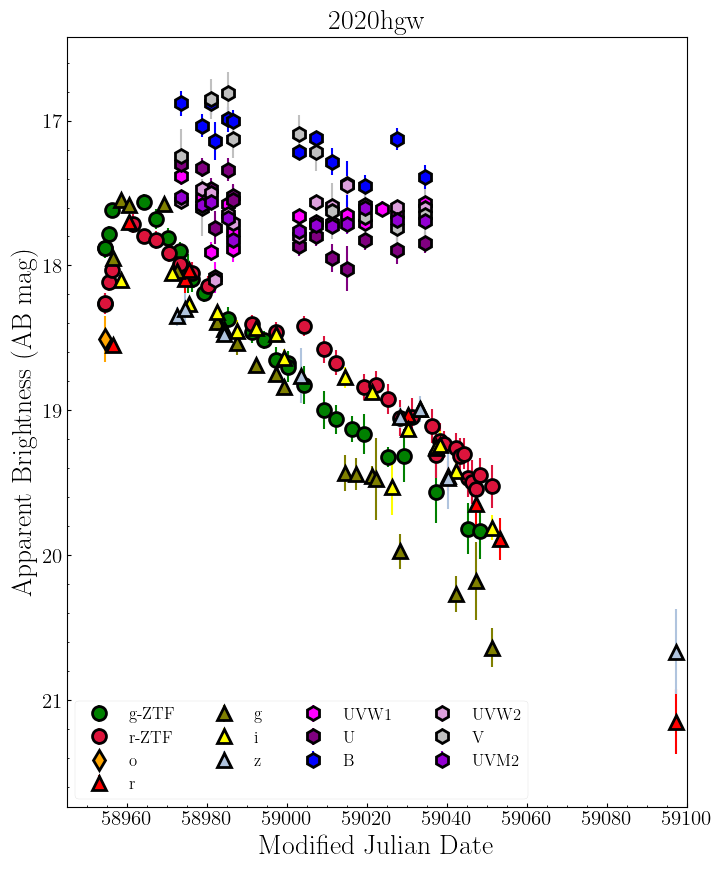

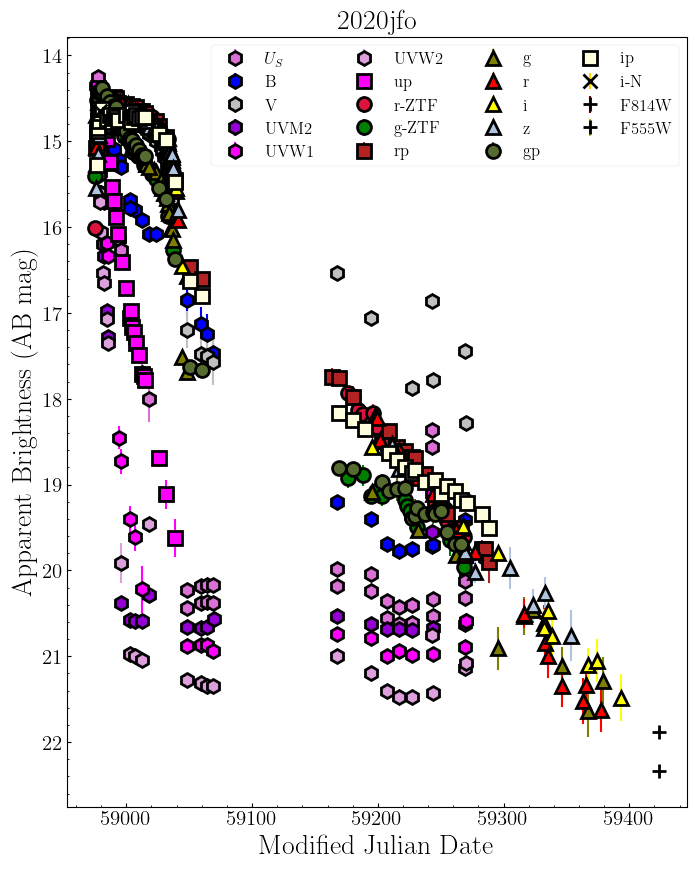

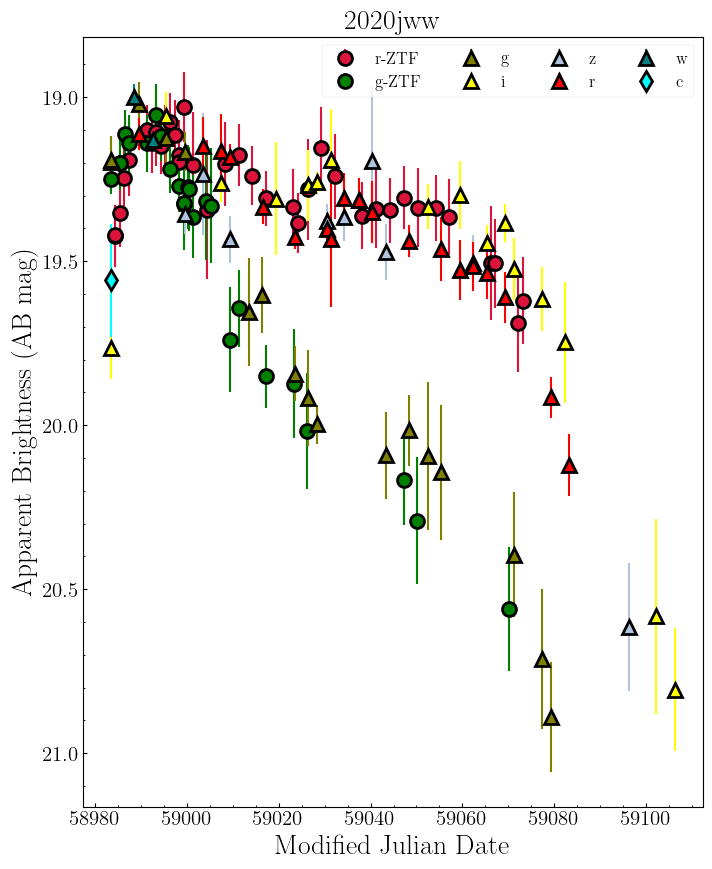

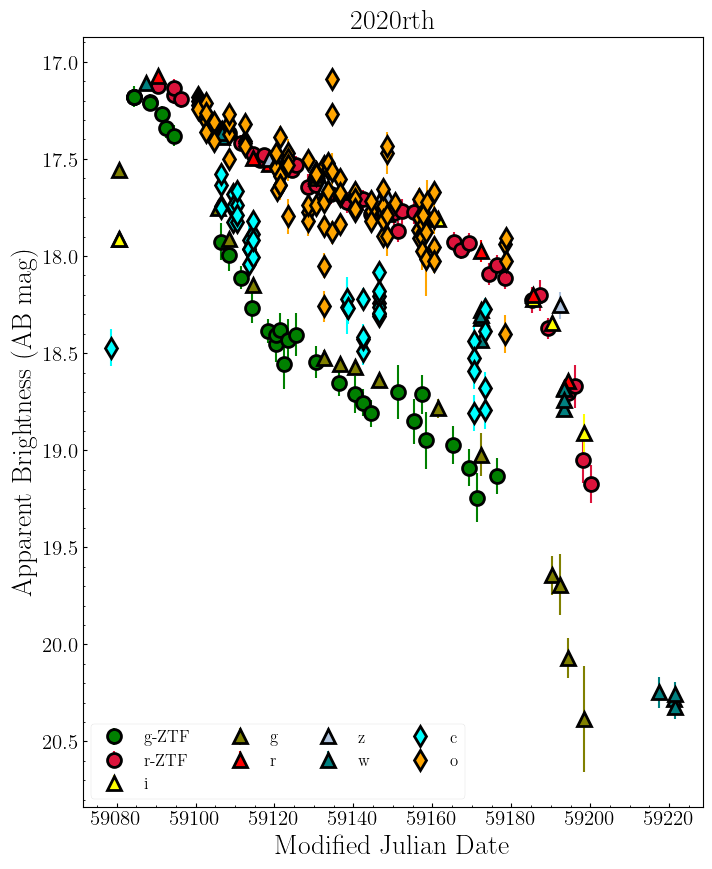

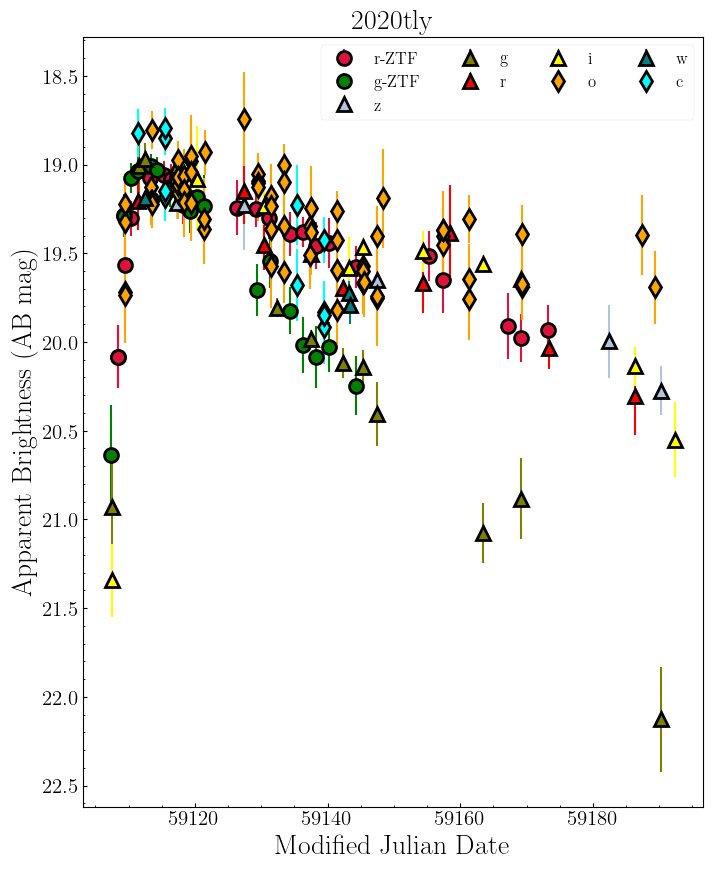

In [113]:
for idx, df in enumerate(full_data_set_df):

    fig, ax = plt.subplots(1, 1, figsize=(8,10))

    name = full_object_names[idx]
    for band in df['FLT'].unique():
        mask = df['FLT'] == band
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:
            instrument, marker, color, bandname = get_formating(band)
            l = ax.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], 
                            fmt = marker, markeredgecolor = 'k', label = bandname, color = color)

    if name == '2020hgw':
        ax.set_xlim(59000-55, 59100)
    
    ax.invert_yaxis()
    ax.set_title(name, fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel('Modified Julian Date', fontsize = 20)
    ax.set_ylabel('Apparent Brightness (AB mag)', fontsize = 20)
    ax.legend(ncol = 4, fontsize = 'large')    

## big plot

In [115]:
filts = {
         'UVM2':['UVM2'],'UVW2':['UVW2'],'UVW1':['UVW1'],
         'U_S':['U_S'],
         'u': ['u','up','U'], 
         'B': ['B'],
         'g':['g','gp','g-ZTF'],
         'V':['V','F555W','G', 'cyan-ATLAS'],
         'r':['r','rp','r-ZTF','R'],
         'w': ['w'],
         'i':['i','ip','i-N', 'F814W', 'orange-ATLAS'],
         'z':['z']}

filts_to_filtlist = {}
for key in filts.keys():
    for band in filts[key]:
        filts_to_filtlist[band] = key

filt_list = list(filts.keys())

label_map = {
    'UVM2': 'UVM2',
    'UVW1': 'UVW1', 
    'UVW2': 'UVW2',
    'u': 'u, U, up, U_S',
    'B': 'B',
    'g': 'g, g-ZTF, gp',
    'V': 'V, F555W, G, cyan-ATLAS',
    'r': 'r, R, rp, r-ZTF, w',
    'i': 'i, ip, i-N, F814W, orange-ATLAS',
    'z': 'z'
}

colors_cm = cm.rainbow(np.linspace(0, 1, len(filt_list)))

In [117]:
def get_labels(label_dict, label_dict_desc):
    legend_tuples=[]
    legend_labels=[]
    for i,filt in enumerate(np.flip(filt_list)):
        if filt in label_dict.keys():
            legend_tuples.append(tuple(label_dict[filt]))
            legend_labels.append(label_dict_desc[filt])

    return legend_tuples, legend_labels

In [120]:
def get_formating(band):
    instrument = band_to_instrument.get(band, 'UNKNOWN')

    filt = filts_to_filtlist.get(band, band)
    idx = filt_list.index(filt) if filt in filt_list else -1

    return instrument, shape.get(instrument, 'o'), colors_cm[idx] if idx != -1 else 'black', bandname_dict.get(band, band)

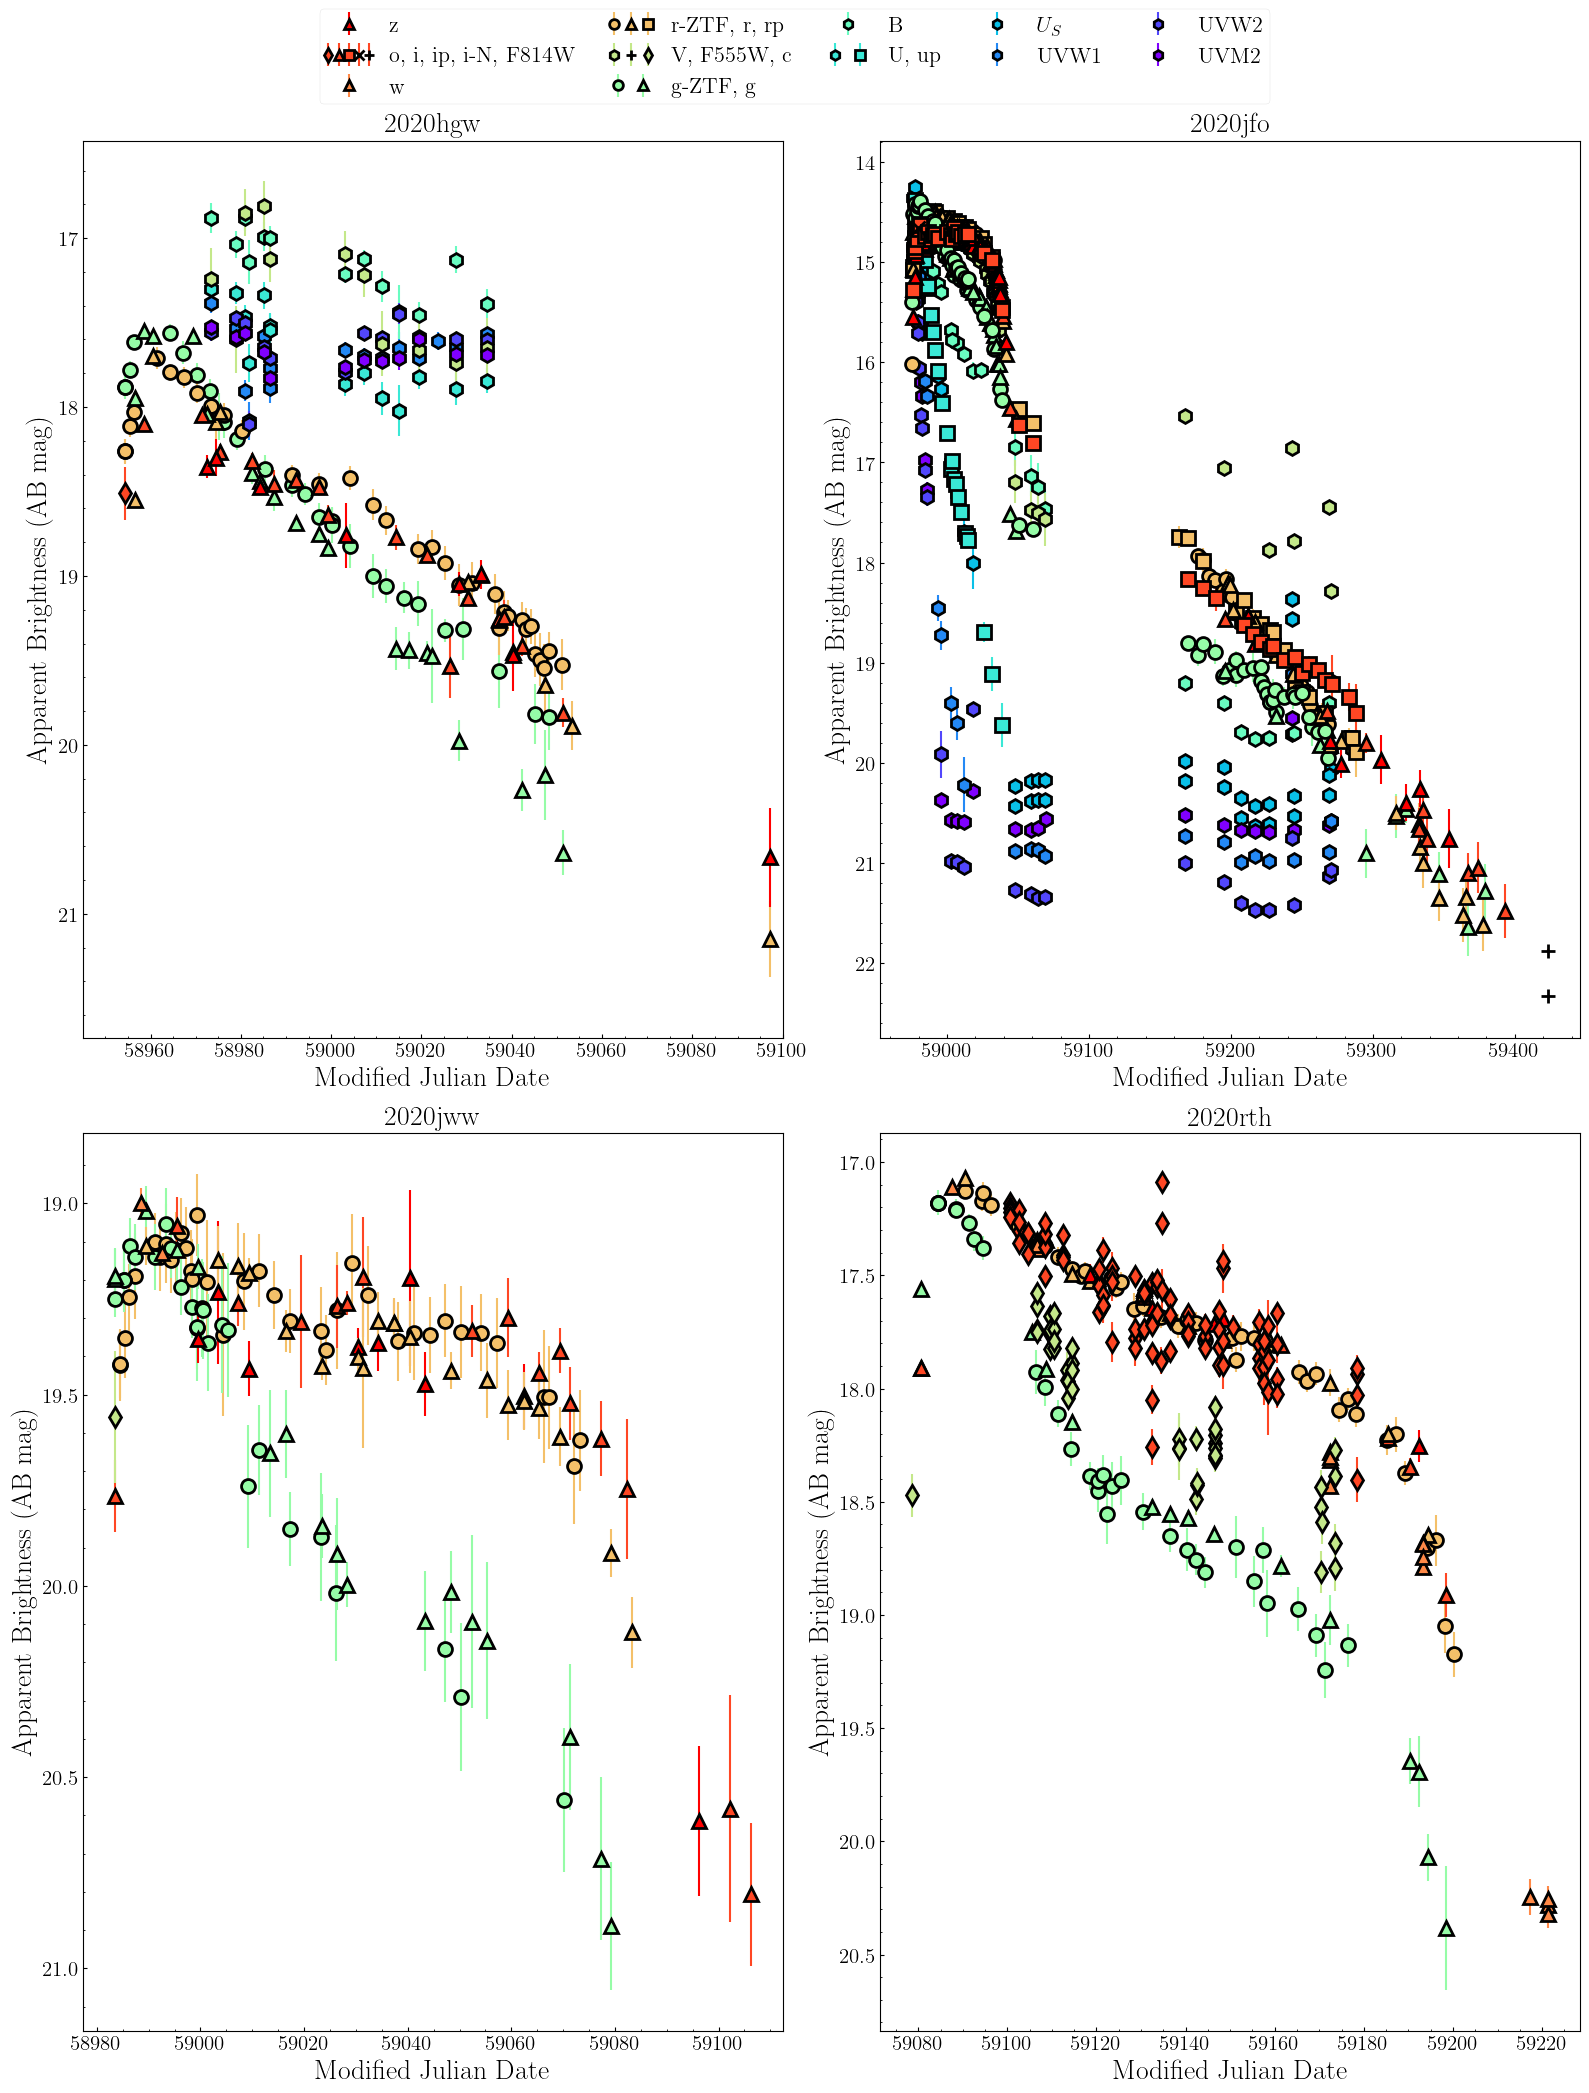

In [122]:
fig, axs = plt.subplots(2, 2, figsize=(16,20))
axs = axs.ravel()

labels = []
label_dict = {}
label_dict_desc = {}

for idx, df in enumerate(full_data_set_df[:4]):

    ax = axs[idx]

    name = full_object_names[idx]
    for band in df['FLT'].unique():
        mask = df['FLT'] == band
        upperlim = df['MAGERR'] < .3
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        if len(df[mask]) > 0:
            instrument, marker, color, bandname = get_formating(band)

            # save the label symbol only once
            metafilt = filts_to_filtlist.get(band, band)
           
            label = None
            if metafilt+marker not in labels:
                labels.append(metafilt+marker)
                label = metafilt
            

            l = ax.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], 
                            fmt = marker, markeredgecolor = 'k', color = color, label = label)

            if label:
                if metafilt in label_dict.keys():
                    label_dict[metafilt].append(l)
                    label_dict_desc[metafilt] += f', {bandname}'
                else:
                    label_dict[metafilt]=[l,]
                    label_dict_desc[metafilt] = f'{bandname}'

    if name == '2020hgw':
        ax.set_xlim(59000-55, 59100)
    
    ax.invert_yaxis()
    ax.set_title(name, fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel('Modified Julian Date', fontsize = 20)
    ax.set_ylabel('Apparent Brightness (AB mag)', fontsize = 20)
    # ax.legend(ncol = 4, fontsize = 'large')  

legend_tuples, legend_labels = get_labels(label_dict, label_dict_desc)

fig.legend(legend_tuples, legend_labels, ncol=5,
           handler_map={tuple: HandlerTuple(ndivide=None)},loc='outside upper center',
          markerscale=0.7,borderpad=0.3,columnspacing=1.5, 
          bbox_to_anchor=(0.5, 1.05), fontsize=16)
plt.tight_layout()